<a href="https://colab.research.google.com/github/dm0969/Divya_INFO5731_Spring2023/blob/main/Divya_Mudireddy_INFO5731_EXERCISE_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The third In-class-exercise (2/28/2023, 40 points in total)

The purpose of this exercise is to understand text representation.

Question 1 (10 points): Describe an interesting text classification or text mining task and explain what kind of features might be useful for you to build the machine learning model. List your features and explain why these features might be helpful. You need to list at least five different types of features.

In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
 
I want to understand sentiment towards a product. 
Here, I would like to focus on 'oximeter'. Large amount of people started using it to monitor their health during COVID-19.
 
Now, I wanted to understand which features are useful and what people are thinking about the product. 
 
To start with, I want to focus on a specific manufacturer’s product and perform sentiment analysis on user reviews. The sentiment analysis will give me understanding of users’ feedback and the frequency vector for the data cloud would give me the information on features that the users are reviewing. 
 
For my sentiment analysis on reviews text, I would like to use the POS tagging technique. Parts of speech in the text define the main context, functions, and usage in a sentence. In this method, I am going to label each word on the text corresponding to a particular part of speech based on the definitions and context. 
 
Some of the speech tags that I like to focus on are: 
Nouns, verbs, personal pronouns, Adjective, Adverbs, Coordinating conjunction, Interjections
 
These POS tagged reviews are converted into a matrix of numbers which is given as an input to classifiers. The Classifier will detect the sentiment in the text. 
 
Here is the link for reviews of the product 'Zacurate Pro Series 500DL Fingertip Pulse Oximeter':  https://www.amazon.com/Zacurate-Fingertip-Oximeter-Saturation-Batteries/product-reviews/B07PQ8WTC4/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=3




'''

"\nPlease write you answer here:\n \nI want to understand sentiment towards a product. \nHere, I would like to focus on 'oximeter'. Large amount of people started using it to monitor their health during COVID-19.\n \nNow, I wanted to understand which features are useful and what people are thinking about the product. \n \nTo start with, I want to focus on a specific manufacturer’s product and perform sentiment analysis on user reviews. The sentiment analysis will give me understanding of users’ feedback and the frequency vector for the data cloud would give me the information on features that the users are reviewing. \n \nFor my sentiment analysis on reviews text, I would like to use the POS tagging technique. Parts of speech in the text define the main context, functions, and usage in a sentence. In this method, I am going to label each word on the text corresponding to a particular part of speech based on the definitions and context. \n \nSome of the speech tags that I like to focus 

Question 2 (10 points): Write python code to extract these features you discussed above. You can collect a few sample text data for the feature extraction. 

In [ ]:
from bs4 import BeautifulSoup
import requests
import urllib.request
import re
import pandas as pd
Hdrs = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0',
    'Accept-Language': 'en-US, en;q=0.5'
}

ttls = []
txt=[]
for dm in range(1,150):
  link = 'https://www.amazon.com/Zacurate-Fingertip-Oximeter-Saturation-Batteries/product-reviews/B07PQ8WTC4/ref=cm_cr_arp_d_paging_btm_next_{str(pg_num)}?ie=UTF8&reviewerType=all_reviews&pageNumber={str(pg_num)}'

  dm = requests.get(link, headers=Hdrs)
  st = BeautifulSoup(dm.content,'html.parser')
  review = st.find_all('a',class_='review-title-content')
  for i in range(len(review)):
    ttls.append(review[i].get_text().strip())
  review_txt= st.find_all('span',class_='review-text-content')
  for r in range(0,len(review_txt)):
    txt.append(review_txt[r].get_text().strip()) 
df_review = pd.DataFrame({
    'Title' : ttls,
    'Review': txt
})
print(f'Shape of the data frame: {df_review.shape}')
df_review

Shape of the data frame: (160, 2)


,Title,Review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was..."
1,like it enough to buy another,i bought a second oximeter to always keep one ...
2,I'm pleased.,It works perfectly well. I'm pleased and expe...
3,Pulse oximeter-a very useful medical device.,I use it to check my O2 saturations and heart ...
4,Covid Essential,Purchased during our first time with covid sim...
...,...,...
155,Worked right out of the box,"You put in the batteries, stick it on your fin..."
156,A Must Have,A must have item in the home to monitor pulse ...
157,"Works well, but can be slow",This pulse oximeter works well and seems to be...
158,Great Device!,This device works well and very easy to use. ...


In [ ]:
df_review["preprocessed_review"] = df_review['Review'].str.replace('[^\w\s]','')
df_review

<ipython-input-7-2f6a8b44ac9d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_revw["preprocessed_review"] = df_revw['Review'].str.replace('[^\w\s]','')


,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",In this uncertain Covid era we learned it was ...
1,like it enough to buy another,i bought a second oximeter to always keep one ...,i bought a second oximeter to always keep one ...
2,I'm pleased.,It works perfectly well. I'm pleased and expe...,It works perfectly well Im pleased and expect...
3,Pulse oximeter-a very useful medical device.,I use it to check my O2 saturations and heart ...,I use it to check my O2 saturations and heart ...
4,Covid Essential,Purchased during our first time with covid sim...,Purchased during our first time with covid sim...
...,...,...,...
155,Worked right out of the box,"You put in the batteries, stick it on your fin...",You put in the batteries stick it on your fing...
156,A Must Have,A must have item in the home to monitor pulse ...,A must have item in the home to monitor pulse ...
157,"Works well, but can be slow",This pulse oximeter works well and seems to be...,This pulse oximeter works well and seems to be...
158,Great Device!,This device works well and very easy to use. ...,This device works well and very easy to use I...


In [ ]:
# Remove numbers
df_revw["preprocessed_review"] = df_revw['preprocessed_review'].str.replace('\d+', '')
# remove special characters
import re
df_revw["preprocessed_review"] = df_revw['preprocessed_review'].apply(lambda t : ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', ch) for ch in t))
df_revw

<ipython-input-8-df1ba766ac24>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_revw["preprocessed_review"] = df_revw['preprocessed_review'].str.replace('\d+', '')


,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",In this uncertain Covid era we learned it was ...
1,like it enough to buy another,i bought a second oximeter to always keep one ...,i bought a second oximeter to always keep one ...
2,I'm pleased.,It works perfectly well. I'm pleased and expe...,It works perfectly well Im pleased and expect...
3,Pulse oximeter-a very useful medical device.,I use it to check my O2 saturations and heart ...,I use it to check my O saturations and heart r...
4,Covid Essential,Purchased during our first time with covid sim...,Purchased during our first time with covid sim...
...,...,...,...
155,Worked right out of the box,"You put in the batteries, stick it on your fin...",You put in the batteries stick it on your fing...
156,A Must Have,A must have item in the home to monitor pulse ...,A must have item in the home to monitor pulse ...
157,"Works well, but can be slow",This pulse oximeter works well and seems to be...,This pulse oximeter works well and seems to be...
158,Great Device!,This device works well and very easy to use. ...,This device works well and very easy to use I...


In [ ]:
df_review['preprocessed_review'] = df_review['preprocessed_review'].apply(lambda text: " ".join(word.lower() for word in text.split()))
df_review

,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",in this uncertain covid era we learned it was ...
1,like it enough to buy another,i bought a second oximeter to always keep one ...,i bought a second oximeter to always keep one ...
2,I'm pleased.,It works perfectly well. I'm pleased and expe...,it works perfectly well im pleased and expect ...
3,Pulse oximeter-a very useful medical device.,I use it to check my O2 saturations and heart ...,i use it to check my o saturations and heart r...
4,Covid Essential,Purchased during our first time with covid sim...,purchased during our first time with covid sim...
...,...,...,...
155,Worked right out of the box,"You put in the batteries, stick it on your fin...",you put in the batteries stick it on your fing...
156,A Must Have,A must have item in the home to monitor pulse ...,a must have item in the home to monitor pulse ...
157,"Works well, but can be slow",This pulse oximeter works well and seems to be...,this pulse oximeter works well and seems to be...
158,Great Device!,This device works well and very easy to use. ...,this device works well and very easy to use i ...


In [ ]:
import nltk
nltk.download()
from nltk.corpus import stopwords
stpwrd = stopwords.words('english')
df_review['preprocessed_review'] = df_review['preprocessed_review'].apply( lambda text : " ".join(w for w in text.split() if w not in sw) )
df_review

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)


,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...
1,like it enough to buy another,i bought a second oximeter to always keep one ...,bought second oximeter always keep one close h...
2,I'm pleased.,It works perfectly well. I'm pleased and expe...,works perfectly well im pleased expect use oft...
3,Pulse oximeter-a very useful medical device.,I use it to check my O2 saturations and heart ...,use check saturations heart rate oxygen someti...
4,Covid Essential,Purchased during our first time with covid sim...,purchased first time covid simply peace mind e...
...,...,...,...
155,Worked right out of the box,"You put in the batteries, stick it on your fin...",put batteries stick finger get reading numbers...
156,A Must Have,A must have item in the home to monitor pulse ...,must item home monitor pulse blood oxygen affo...
157,"Works well, but can be slow",This pulse oximeter works well and seems to be...,pulse oximeter works well seems fairly accurat...
158,Great Device!,This device works well and very easy to use. ...,device works well easy use get readings get do...


In [ ]:
import nltk
nltk.download('omw-1.4')
from textblob import Word
df_review['preprocessed_review'] = df_review['preprocessed_review'].apply( lambda text : " ".join([ Word(i).lemmatize() for i in text.split()]))
df_review

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...
1,like it enough to buy another,i bought a second oximeter to always keep one ...,bought second oximeter always keep one close h...
2,I'm pleased.,It works perfectly well. I'm pleased and expe...,work perfectly well im pleased expect use ofte...
3,Pulse oximeter-a very useful medical device.,I use it to check my O2 saturations and heart ...,use check saturation heart rate oxygen sometim...
4,Covid Essential,Purchased during our first time with covid sim...,purchased first time covid simply peace mind e...
...,...,...,...
155,Worked right out of the box,"You put in the batteries, stick it on your fin...",put battery stick finger get reading number bi...
156,A Must Have,A must have item in the home to monitor pulse ...,must item home monitor pulse blood oxygen affo...
157,"Works well, but can be slow",This pulse oximeter works well and seems to be...,pulse oximeter work well seems fairly accurate...
158,Great Device!,This device works well and very easy to use. ...,device work well easy use get reading get doct...


In [ ]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
df_review['tagged_pos'] = df_review['preprocessed_review'].str.split().map(pos_tag)
df_review

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,Title,Review,preprocessed_review,tagged_pos
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...,"[(uncertain, JJ), (covid, NN), (era, NN), (lea..."
1,like it enough to buy another,i bought a second oximeter to always keep one ...,bought second oximeter always keep one close h...,"[(bought, JJ), (second, JJ), (oximeter, NN), (..."
2,I'm pleased.,It works perfectly well. I'm pleased and expe...,work perfectly well im pleased expect use ofte...,"[(work, NN), (perfectly, RB), (well, RB), (im,..."
3,Pulse oximeter-a very useful medical device.,I use it to check my O2 saturations and heart ...,use check saturation heart rate oxygen sometim...,"[(use, NN), (check, NN), (saturation, NN), (he..."
4,Covid Essential,Purchased during our first time with covid sim...,purchased first time covid simply peace mind e...,"[(purchased, VBN), (first, JJ), (time, NN), (c..."
...,...,...,...,...
155,Worked right out of the box,"You put in the batteries, stick it on your fin...",put battery stick finger get reading number bi...,"[(put, VB), (battery, NN), (stick, NN), (finge..."
156,A Must Have,A must have item in the home to monitor pulse ...,must item home monitor pulse blood oxygen affo...,"[(must, MD), (item, VB), (home, NN), (monitor,..."
157,"Works well, but can be slow",This pulse oximeter works well and seems to be...,pulse oximeter work well seems fairly accurate...,"[(pulse, JJ), (oximeter, NN), (work, NN), (wel..."
158,Great Device!,This device works well and very easy to use. ...,device work well easy use get reading get doct...,"[(device, NN), (work, NN), (well, RB), (easy, ..."


In [ ]:
#Adding count of POS of each row
adjctv = []
advb = []
coord_conj = []
s_conj = []
interj = []
noun = []
verb = []
pron = []
predet = []
det= []
def tags(atags):
  for t in atags:
    na= 0
    nad = 0
    ncon= 0
    nsconj = 0
    ninter = 0
    nno = 0
    nve= 0
    nppro= 0
    npredet = 0
    ndet = 0
    for i,j in t:
      if j == 'JJ':
        na =  na + 1
      elif j == 'RB':
        nad = nad + 1
      elif j == 'CC':
        nccon = nccon + 1
      elif j == 'UH':
        ninter = ninter + 1
      elif j == 'NN':
        nno = nno + 1
      elif j == 'VR':
        nve = nve + 1
      elif j == 'PRP':
        nppro = nppro + 1
      elif j == 'PDT':
        npredet = npredet + 1
      elif j == 'DT':
        ndet = ndet + 1
      elif j == 'IN':
        nsconj = nsconj + 1
    
    adjctv.append(na)
    advb.append(nad)
    coord_conj.append(ncon)
    s_conj.append(nsconj)
    interj.append(ninter)
    noun.append(nno)
    verb.append(nve)
    pron.append(nppro)
    predet.append(npredet)
    det.append(ndet)
tags(df_revw['tagged_pos'])
df_review['num of adjectives'] = adjctv
df_review['num of adverbs'] = advb
df_review['num of coordinate conjunctions'] = coord_conj
df_review['num of conjuctions'] = s_conj
df_review['num of interjections'] = interj
df_review['num of nouns'] = noun
df_review['num of verbs'] = verb
df_review['num of pronouns'] = pron
df_review['nump of predeterminers'] = predet
df_review['num of determiner'] = det

df_review

,Title,Review,preprocessed_review,tagged_pos,num of adj,num of adverb,num of conjunction,num of conjuction,num of interjection,num of noun,num of verb,num of pronoun,nump of predeterminer,num of determiner
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...,"[(uncertain, JJ), (covid, NN), (era, NN), (lea...",52,28,0,2,0,90,0,0,0,0
1,like it enough to buy another,i bought a second oximeter to always keep one ...,bought second oximeter always keep one close h...,"[(bought, JJ), (second, JJ), (oximeter, NN), (...",27,7,0,1,0,26,0,0,0,1
2,I'm pleased.,It works perfectly well. I'm pleased and expe...,work perfectly well im pleased expect use ofte...,"[(work, NN), (perfectly, RB), (well, RB), (im,...",13,9,0,1,0,17,0,0,0,0
3,Pulse oximeter-a very useful medical device.,I use it to check my O2 saturations and heart ...,use check saturation heart rate oxygen sometim...,"[(use, NN), (check, NN), (saturation, NN), (he...",5,3,0,0,0,16,0,0,0,0
4,Covid Essential,Purchased during our first time with covid sim...,purchased first time covid simply peace mind e...,"[(purchased, VBN), (first, JJ), (time, NN), (c...",7,3,0,1,0,12,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Worked right out of the box,"You put in the batteries, stick it on your fin...",put battery stick finger get reading number bi...,"[(put, VB), (battery, NN), (stick, NN), (finge...",2,0,0,0,0,5,0,0,0,0
156,A Must Have,A must have item in the home to monitor pulse ...,must item home monitor pulse blood oxygen affo...,"[(must, MD), (item, VB), (home, NN), (monitor,...",2,1,0,0,0,6,0,0,0,0
157,"Works well, but can be slow",This pulse oximeter works well and seems to be...,pulse oximeter work well seems fairly accurate...,"[(pulse, JJ), (oximeter, NN), (work, NN), (wel...",4,3,0,0,0,5,0,0,0,0
158,Great Device!,This device works well and very easy to use. ...,device work well easy use get reading get doct...,"[(device, NN), (work, NN), (well, RB), (easy, ...",2,1,0,0,0,5,0,0,0,0


Question 3 (10 points): Use any of the feature selection methods mentioned in this paper "Deng, X., Li, Y., Weng, J., & Zhang, J. (2019). Feature selection for text classification: A review. Multimedia Tools & Applications, 78(3)." Select the most important features you extracted above, rank the features based on their importance in the descending order. 

In [ ]:
# You code here (Please add comments in the code):
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

numbers = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numbers_feat = df_review.select_dtypes(include=numbers)
print(f'Shape: {numbers_feat.shape}')
numbers_feat




Shape: (160, 10)


,num of adj,num of adverb,num of conjunction,num of conjuction,num of interjection,num of noun,num of verb,num of pronoun,nump of predeterminer,num of determiner
0,52,28,0,2,0,90,0,0,0,0
1,27,7,0,1,0,26,0,0,0,1
2,13,9,0,1,0,17,0,0,0,0
3,5,3,0,0,0,16,0,0,0,0
4,7,3,0,1,0,12,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
155,2,0,0,0,0,5,0,0,0,0
156,2,1,0,0,0,6,0,0,0,0
157,4,3,0,0,0,5,0,0,0,0
158,2,1,0,0,0,5,0,0,0,0


In [ ]:
d = numbers_feat
m = df_review['preprocessed_review']
print(f'SHAPE of X: {d.shape}')
print(f'SHAPE of Y: {m.shape}')

SHAPE of X: (160, 10)
SHAPE of Y: (160,)


In [ ]:
xt, xte, yt, yte = train_test_split(d, m, test_size=0.2, random_state=60)
xt.shape, xte.shape

((128, 10), (32, 10))

<AxesSubplot:>

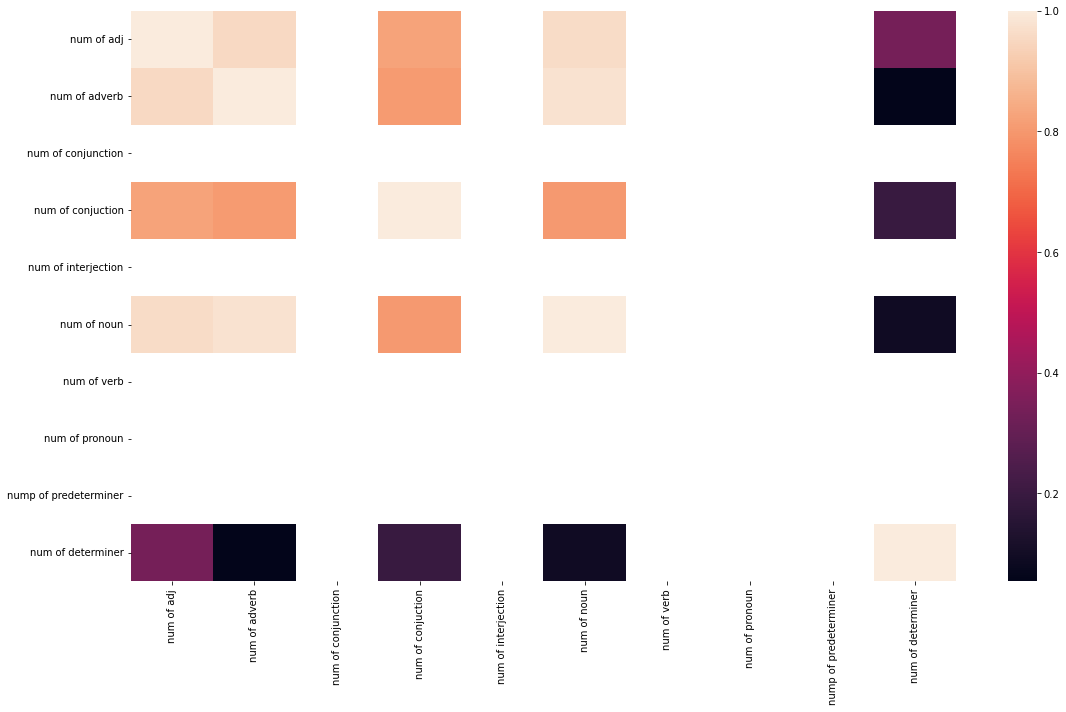

In [ ]:
corr = xt.corr()
f, d = plt.subplots()
f.set_size_inches(18.5, 10.5)
sns.heatmap(corr)

In [ ]:
def correlated(co, thres):
  col = []
  data = co.corr()
  for r in range(len(data.columns)):
    for c in range(r):
      if (abs(data.iloc[r, c]) > thres):
        col.append(data.columns[r])
  return col


corr = list(set(correlated(xt, 0.5)))
print(f'correlated features are: {set(corr)}')

correlated features are: {'num of noun', 'num of conjuction', 'num of adverb'}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=20, random_state=100, max_depth=2)
forest.fit(xt[corr].fillna(0), yt)

RandomForestClassifier(max_depth=2, n_estimators=20, random_state=100)

In [ ]:
w = pd.concat([pd.Series(corr), pd.Series(forest.feature_importances_)], axis=1)
w.columns = ['columns', 'weight']
w.sort_values(by='weight', ascending=False)

,columns,weight
2,num of adverb,0.388098
0,num of noun,0.378525
1,num of conjuction,0.233377


Question 4 (10 points): Write python code to rank the text based on text similarity. Based on the text data you used for question 2, design a query to match the most relevant docments. Please use the BERT model to represent both your query and the text data, then calculate the cosine similarity between the query and each text in your data. Rank the similary with descending order. 

In [ ]:
!pip install torchvision 
!pip install transformers

In [ ]:
# You code here (Please add comments in the code):

from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load the pre-trained BERT model and tokenizer
tknzer = AutoTokenizer.from_pretrained('bert-base-uncased')
mdl = AutoModel.from_pretrained('bert-base-uncased')

# Define the text data and query
txt_dt = ['This is the first text', 'This is the second text', 'This is the third text', 'This is the fourth text']
qry = 'This is a test query'

# Prepare the input data by encoding the text data and query using the BERT tokenizer
encoded_txt_dt = tknzer(txt_dt, padding=True, truncation=True, return_tensors='pt')
encoded_qry = tknzer(qry, padding=True, truncation=True, return_tensors='pt')

# Pass the input data through the BERT model to obtain the embeddings
with torch.no_grad():
    txt_embeddings = mdl(**encoded_txt_dt)[0][:, 0, :]
    qry_embedding = mdl(**encoded_qry)[0][:, 0, :]

# Calculate the cosine similarity between the query and each text data embedding using numpy
smlarty_scrs = cosine_similarity(qry_embedding, txt_embeddings)

# Sort the similarity scores in descending order to rank the text data based on similarity
rnkd_indices = np.argsort(smlarty_scrs, axis=1)[:, ::-1]
rnkd_txt_dt = [txt_dt[i] for i in rnkd_indices[0]]

print(rnkd_txt_dt)

